In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
S01_path = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/process_data/S01_final_df.csv'

S01_df = pd.read_csv(S01_path, index_col=False, parse_dates=['DateTime'])

# Set 'DateTime' column as the index
S01_df.set_index('DateTime', inplace=True)

# Display the DataFrame
print(S01_df)

                    ID_instance     hrv_vlf      hrv_lf      hrv_hf  \
DateTime                                                              
2023-09-07 06:50:36       S01_1   21.621721  291.718700   82.458752   
2023-09-07 06:50:37       S01_1   21.611134  291.312631   82.622348   
2023-09-07 06:50:38       S01_1   21.600547  290.906563   82.785944   
2023-09-07 06:50:39       S01_1   21.589960  290.500494   82.949541   
2023-09-07 06:50:40       S01_1   21.579373  290.094426   83.113137   
...                         ...         ...         ...         ...   
2023-09-29 06:55:43      S01_21  116.391027  383.615929  404.912068   
2023-09-29 06:55:44      S01_21  116.391027  383.615929  404.912068   
2023-09-29 06:55:45      S01_21  116.391027  383.615929  404.912068   
2023-09-29 06:55:46      S01_21  116.391027  383.615929  404.912068   
2023-09-29 06:55:47      S01_21  116.391027  383.615929  404.912068   

                      hrv_sdnn  hrv_rmssd  hrv_mean_nni  hrv_median_nni  \
D

In [3]:
# Group by 'id_instance' and calculate time duration
time_duration = S01_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())

# Convert time duration to seconds for better readability (optional)
time_duration = (time_duration.dt.total_seconds()/60).round(2)
# time_duration = time_duration.round(2)

print(time_duration)

ID_instance
S01_1      36.08
S01_10     39.73
S01_11     34.77
S01_12     16.82
S01_13     22.77
S01_14     44.92
S01_15    219.05
S01_16     35.05
S01_17     19.70
S01_18     28.82
S01_19     12.00
S01_2      46.67
S01_20      8.07
S01_21     24.80
S01_3      29.05
S01_4      27.77
S01_5      33.55
S01_6      52.32
S01_7     592.45
S01_8      14.25
S01_9     212.92
dtype: float64


C:\Users\Tomar\AppData\Local\Temp\ipykernel_46504\4024322672.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  time_duration = S01_df.groupby('ID_instance').apply(lambda x: x.index.max() - x.index.min())


In [4]:
instances_over_60_minutes = time_duration[time_duration > 60].index

# Remove rows corresponding to instances over 60 minutes inplace
S01_df.drop(S01_df[S01_df['ID_instance'].isin(instances_over_60_minutes)].index, inplace=True)


In [5]:
S01_df.isnull().sum()

ID_instance          20
hrv_vlf               0
hrv_lf                0
hrv_hf                0
hrv_sdnn              0
hrv_rmssd             0
hrv_mean_nni          0
hrv_median_nni        0
hrv_range_nni         0
hrv_entropy           0
eda_tonic_mean        0
eda_tonic_std         0
eda_tonic_sum         0
eda_tonic_energy      0
eda_phasic_mean       0
eda_phasic_std        0
eda_phasic_sum        0
eda_phasic_energy     0
acc_acc_x_min         0
acc_acc_y_min         0
acc_acc_z_min         0
acc_l2_min            0
acc_acc_x_max         0
acc_acc_y_max         0
acc_acc_z_max         0
acc_l2_max            0
acc_acc_x_ptp         0
acc_acc_y_ptp         0
acc_acc_z_ptp         0
acc_l2_ptp            0
Temp(C)_N1            0
RH(%)_N1              0
Dewpoint(C)_N1        0
Temp(C)_N2            0
RH(%)_N2              0
Dewpoint(C)_N2        0
Temp(C)_N3            0
RH(%)_N3              0
Dewpoint(C)_N3        0
Temp(C)_N4            0
RH(%)_N4              0
Dewpoint(C)_N4  

In [6]:
S01_df.dropna(subset=['ID_instance'], inplace=True)

In [7]:
S01_df['ID_instance'].unique()

array(['S01_1', 'S01_2', 'S01_3', 'S01_4', 'S01_5', 'S01_6', 'S01_8',
       'S01_10', 'S01_11', 'S01_12', 'S01_13', 'S01_14', 'S01_16',
       'S01_17', 'S01_18', 'S01_19', 'S01_20', 'S01_21'], dtype=object)

In [8]:
S01_df.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'acc_acc_x_min', 'acc_acc_y_min', 'acc_acc_z_min',
       'acc_l2_min', 'acc_acc_x_max', 'acc_acc_y_max', 'acc_acc_z_max',
       'acc_l2_max', 'acc_acc_x_ptp', 'acc_acc_y_ptp', 'acc_acc_z_ptp',
       'acc_l2_ptp', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2',
       'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

In [9]:
S01_df.columns[1:18]

Index(['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd', 'hrv_mean_nni',
       'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy', 'eda_tonic_mean',
       'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy', 'eda_phasic_mean',
       'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy'],
      dtype='object')

In [10]:
S01_df.columns[30:42]

Index(['Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1', 'Temp(C)_N2', 'RH(%)_N2',
       'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3', 'Dewpoint(C)_N3',
       'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4'],
      dtype='object')

In [11]:
# Selecting physiological features (excluding Subject and Commuting columns)
physiological_data = S01_df.columns[1:18] 

# Selecting environmental parameters
environmental_data = S01_df.columns[30:42] 

# Calculating correlation matrix
correlation_matrix = S01_df[list(physiological_data) + list(environmental_data)].corr(method='spearman')

# Extracting correlations between physiological features and environmental parameters
correlation_phys_env = correlation_matrix.loc[physiological_data, environmental_data]

correlation_phys_env


,Temp(C)_N1,RH(%)_N1,Dewpoint(C)_N1,Temp(C)_N2,RH(%)_N2,Dewpoint(C)_N2,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4
hrv_vlf,-0.233747,0.258428,-0.194292,-0.218039,0.235329,-0.197996,-0.233682,0.253732,-0.196464,-0.232091,0.253751,-0.196726
hrv_lf,0.071831,-0.096152,-0.036089,0.094735,-0.119733,-0.045259,0.072087,-0.102562,-0.037671,0.071645,-0.101803,-0.038460
hrv_hf,0.202845,-0.227439,0.138564,0.201673,-0.226559,0.129667,0.203574,-0.231630,0.138104,0.199046,-0.228859,0.137119
hrv_sdnn,0.206933,-0.313669,0.010586,0.236861,-0.340306,0.000068,0.207523,-0.323408,0.008837,0.204075,-0.321009,0.007916
hrv_rmssd,0.237098,-0.412444,0.000413,0.270960,-0.438875,-0.008958,0.237530,-0.422464,-0.001180,0.234254,-0.420203,-0.001849
hrv_mean_nni,0.065640,-0.299735,0.100647,0.110265,-0.323227,0.085456,0.065811,-0.308072,0.100882,0.063543,-0.307119,0.100417
hrv_median_nni,0.058668,-0.281160,0.117332,0.104462,-0.303306,0.101797,0.058787,-0.289225,0.117707,0.056897,-0.288403,0.117388
hrv_range_nni,0.184092,-0.253260,0.065067,0.215127,-0.274230,0.057611,0.184803,-0.262753,0.063232,0.181292,-0.260680,0.062305
hrv_entropy,-0.126176,0.374879,-0.058383,-0.112202,0.355784,-0.051777,-0.126372,0.376122,-0.059181,-0.123867,0.374278,-0.059121
eda_tonic_mean,0.160797,-0.405703,0.156118,0.139859,-0.369283,0.164240,0.161241,-0.403280,0.156758,0.161119,-0.403207,0.157212


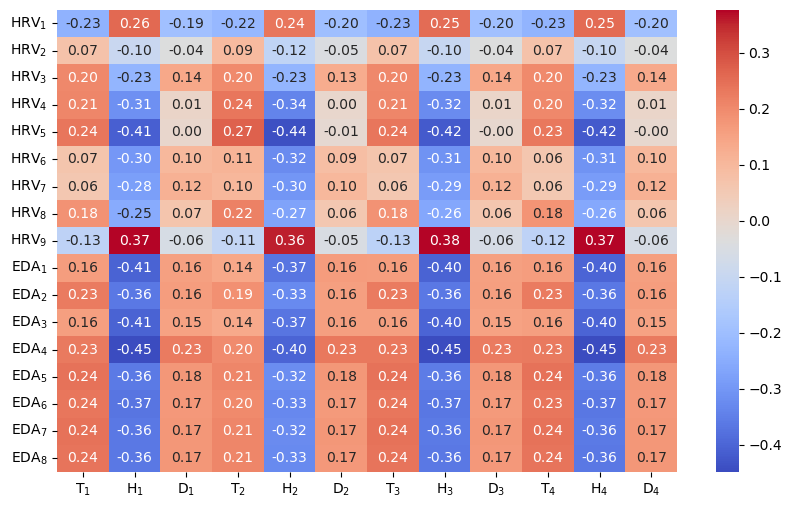

In [12]:
# Define the new column names with LaTeX subscript representation
new_column_names = {
    'Temp(C)_N1': 'T$_{1}$',
    'RH(%)_N1': 'H$_{1}$',
    'Dewpoint(C)_N1': 'D$_{1}$',
    'Temp(C)_N2': 'T$_{2}$',
    'RH(%)_N2': 'H$_{2}$',
    'Dewpoint(C)_N2': 'D$_{2}$',
    'Temp(C)_N3': 'T$_{3}$',
    'RH(%)_N3': 'H$_{3}$',
    'Dewpoint(C)_N3': 'D$_{3}$',
    'Temp(C)_N4': 'T$_{4}$',
    'RH(%)_N4': 'H$_{4}$',
    'Dewpoint(C)_N4': 'D$_{4}$',

    'hrv_vlf': 'HRV$_1$',
    'hrv_lf': 'HRV$_2$',
    'hrv_hf': 'HRV$_3$',
    'hrv_sdnn': 'HRV$_4$',
    'hrv_rmssd': 'HRV$_5$',
    'hrv_mean_nni': 'HRV$_6$',
    'hrv_median_nni': 'HRV$_7$',
    'hrv_range_nni': 'HRV$_8$',
    'hrv_entropy': 'HRV$_9$',

    'eda_tonic_mean': 'EDA$_1$',
    'eda_tonic_std': 'EDA$_2$',
    'eda_tonic_sum': 'EDA$_3$',
    'eda_tonic_energy': 'EDA$_4$',
    'eda_phasic_mean': 'EDA$_5$',
    'eda_phasic_std': 'EDA$_6$',
    'eda_phasic_sum': 'EDA$_7$',
    'eda_phasic_energy': 'EDA$_8$',

    # 'acc_acc_x_min': 'ACC$_1$',
    # 'acc_acc_y_min': 'ACC$_2$' ,
    # 'acc_acc_z_min': 'ACC$_3$', 
    # 'acc_l2_min': 'ACC$_4$',
    # 'acc_acc_x_max': 'ACC$_5$',
    # 'acc_acc_y_max': 'ACC$_6$', 
    # 'acc_acc_z_max': 'ACC$_7$', 
    # 'acc_l2_max': 'ACC$_8$',
    # 'acc_acc_x_ptp': 'ACC$_9$', 
    # 'acc_acc_y_ptp': 'ACC$_{10}$', 
    # 'acc_acc_z_ptp': 'ACC$_{11}$', 
    # 'acc_l2_ptp': 'ACC$_{12}$'
}

# Rename columns
correlation_phys_env_renamed = correlation_phys_env.rename(columns=new_column_names, index=new_column_names)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_phys_env_renamed, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
# plt.title('S01')
# plt.xlabel('environmental parameters', fontsize=14)
# plt.ylabel('physiological features', fontsize=14)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# Save the plot as eps & png file
outpath = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/viz/'
plt.savefig(outpath+'S01_heatmap.eps', format='eps', bbox_inches='tight')
plt.savefig(outpath+'S01_heatmap.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


In [13]:
# Drop columns starting with 'acc_'
data = S01_df.filter(regex='^(?!acc_)')

In [14]:
data.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1',
       'Temp(C)_N2', 'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5'],
      dtype='object')

### Comfort function Implementation

In [15]:
# List of all physiological variables
physio_vars = ['hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
               'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
               'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
               'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum', 'eda_phasic_energy']

# Environmental variables to consider
env_vars = ['Temp(C)_N1', 'RH(%)_N1']

# Compute Spearman correlations
correlations = data[physio_vars + env_vars].corr(method='spearman')

# HRV and EDA groups for correlation
hrv_vars = physio_vars[:9]  # Assuming the first 9 are HRV related
eda_vars = physio_vars[9:]  # Assuming the rest are EDA related

# Identify one HRV and one EDA variable with the strongest correlation with any environmental variable
strongest_corr_hrv = correlations.loc[hrv_vars, env_vars].abs().max().idxmax()
strongest_corr_eda = correlations.loc[eda_vars, env_vars].abs().max().idxmax()

# Extract the specific HRV and EDA variable names with the highest correlation
strongest_corr_hrv_var = correlations.loc[hrv_vars, env_vars].abs().idxmax()[strongest_corr_hrv]
strongest_corr_eda_var = correlations.loc[eda_vars, env_vars].abs().idxmax()[strongest_corr_eda]

# Define thresholds using the identified variables and adjusted quartiles for environmental variables
thresholds = {
    strongest_corr_hrv_var: data[strongest_corr_hrv_var].quantile(0.75),
    strongest_corr_eda_var: data[strongest_corr_eda_var].quantile(0.25),
    'Temp(C)_N1': [data['Temp(C)_N1'].quantile(0.30), data['Temp(C)_N1'].quantile(0.65)],
    'RH(%)_N1': [data['RH(%)_N1'].quantile(0.30), data['RH(%)_N1'].quantile(0.65)]
}

# Define the comfort function
def comfort_label(row):
    comfort = (row[strongest_corr_hrv_var] >= thresholds[strongest_corr_hrv_var] and
               row[strongest_corr_eda_var] <= thresholds[strongest_corr_eda_var] and
               thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1] and
               thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1])
    
    if comfort:
        return 1
    
    discomfort = (row[strongest_corr_hrv_var] < thresholds[strongest_corr_hrv_var] and
                  row[strongest_corr_eda_var] > thresholds[strongest_corr_eda_var] and
                  not (thresholds['Temp(C)_N1'][0] <= row['Temp(C)_N1'] <= thresholds['Temp(C)_N1'][1]) or
                  not (thresholds['RH(%)_N1'][0] <= row['RH(%)_N1'] <= thresholds['RH(%)_N1'][1]))
    
    if discomfort:
        return 0
    
    return 0.5  # Sensible label for ambiguous cases

# Apply the comfort function and count labels
data['lambda'] = data.apply(comfort_label, axis=1)
label_counts = data['lambda'].value_counts(normalize=True) * 100

# Print the names of variables used for the comfort function
print("Variables considered for the comfort function:")
print(f"HRV Variable: {strongest_corr_hrv_var}")
print(f"EDA Variable: {strongest_corr_eda_var}")
print("Environmental Variables: Temp(C)_N1, RH(%)_N1")

# Print the percentage of labeled values
print("Label Distribution (%):")
print(label_counts)

print("saving data files as pkl")
savepath = 'C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/final_data/data_S01.pkl'
data.to_pickle(savepath)

Variables considered for the comfort function:
HRV Variable: hrv_rmssd
EDA Variable: eda_tonic_energy
Environmental Variables: Temp(C)_N1, RH(%)_N1
Label Distribution (%):
lambda
0.5    62.244446
0.0    34.796506
1.0     2.959048
Name: proportion, dtype: float64
saving data files as pkl


C:\Users\Tomar\AppData\Local\Temp\ipykernel_46504\656730288.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lambda'] = data.apply(comfort_label, axis=1)


In [16]:
data.columns

Index(['ID_instance', 'hrv_vlf', 'hrv_lf', 'hrv_hf', 'hrv_sdnn', 'hrv_rmssd',
       'hrv_mean_nni', 'hrv_median_nni', 'hrv_range_nni', 'hrv_entropy',
       'eda_tonic_mean', 'eda_tonic_std', 'eda_tonic_sum', 'eda_tonic_energy',
       'eda_phasic_mean', 'eda_phasic_std', 'eda_phasic_sum',
       'eda_phasic_energy', 'Temp(C)_N1', 'RH(%)_N1', 'Dewpoint(C)_N1',
       'Temp(C)_N2', 'RH(%)_N2', 'Dewpoint(C)_N2', 'Temp(C)_N3', 'RH(%)_N3',
       'Dewpoint(C)_N3', 'Temp(C)_N4', 'RH(%)_N4', 'Dewpoint(C)_N4',
       'Temp(C)_N5', 'RH(%)_N5', 'Dewpoint(C)_N5', 'lambda'],
      dtype='object')

In [17]:
data.head()

,ID_instance,hrv_vlf,hrv_lf,hrv_hf,hrv_sdnn,hrv_rmssd,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_entropy,...,Temp(C)_N3,RH(%)_N3,Dewpoint(C)_N3,Temp(C)_N4,RH(%)_N4,Dewpoint(C)_N4,Temp(C)_N5,RH(%)_N5,Dewpoint(C)_N5,lambda
DateTime,,,,,,,,,,,,,,,,,,,,,
2023-09-07 06:50:36,S01_1,21.621721,291.718700,82.458752,28.888495,33.684269,707.170317,703.273339,109.325554,3.463833,...,19.788,55.0,10.5,19.502,46.8,7.8,24.21,48.7,12.7,0.0
2023-09-07 06:50:37,S01_1,21.611134,291.312631,82.622348,28.884024,33.692545,707.309385,703.421677,109.276108,3.462736,...,19.788,55.0,10.5,19.502,46.8,7.8,24.21,48.7,12.7,0.0
2023-09-07 06:50:38,S01_1,21.600547,290.906563,82.785944,28.879554,33.700820,707.448452,703.570016,109.226661,3.461640,...,19.788,55.0,10.5,19.502,46.8,7.8,24.21,48.7,12.7,0.0
2023-09-07 06:50:39,S01_1,21.589960,290.500494,82.949541,28.875084,33.709095,707.587520,703.718354,109.177215,3.460544,...,19.788,55.0,10.5,19.502,46.8,7.8,24.21,48.7,12.7,0.0
2023-09-07 06:50:40,S01_1,21.579373,290.094426,83.113137,28.870613,33.717370,707.726587,703.866693,109.127769,3.459447,...,19.788,55.0,10.5,19.502,46.8,7.8,24.21,48.7,12.7,0.0


### Filtering living lab data

In [18]:
# Save filtered data for each unique instance separately and prepare data for model training


# Find unique instances in the 'ID_instance' column
unique_instances = data['ID_instance'].unique()
unique_instances


# Load the data from the pickle file
ll_a_data = pd.read_csv("C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/living_lab/LL/LL_a.csv")

# Convert 'DateTime' to datetime in both datasets
ll_a_data['DateTime'] = pd.to_datetime(ll_a_data['DateTime'])
# Create a directory to store the filtered data files if it does not exist
filtered_data_dir = "C:/Users/Tomar/dev/vehicle_indoor_comfort/summer_2023/output/living_lab/final/S01/"
os.makedirs(filtered_data_dir, exist_ok=True)

# Dictionary to hold model data
model_data = {}

for instance in unique_instances:
    # Get the start and end times for filtering
    start_time = data[data['ID_instance'] == instance].index.min()
    end_time = pd.Timestamp(year=start_time.year, month=start_time.month, day=start_time.day, hour=18, minute=0)
    
    # Filter rows in LL_a.csv
    instance_data = ll_a_data[(ll_a_data['DateTime'] > start_time) & (ll_a_data['DateTime'] <= end_time)]
    
    # Save filtered data to CSV
    file_path = os.path.join(filtered_data_dir, f"{instance}_filtered_data.csv")
    instance_data.to_csv(file_path, index=False)
    
    # Extract 'lambda' for the current instance as the target variable
    lambda_value = data[data['ID_instance'] == instance]['lambda'].iloc[0]
    
    # Store instance data and lambda for model preparation
    model_data[instance] = {'data': instance_data, 'lambda': lambda_value}

# Confirm data saving and preparation
list(model_data.keys())[:5], os.listdir(filtered_data_dir)[:5]  # Display some keys and files to verify


(['S01_1', 'S01_2', 'S01_3', 'S01_4', 'S01_5'],
 ['S01_10_filtered_data.csv',
  'S01_11_filtered_data.csv',
  'S01_12_filtered_data.csv',
  'S01_13_filtered_data.csv',
  'S01_14_filtered_data.csv'])

#### Compare commuting with living lab

In [26]:
# Updated comparison using a specific temperature column from data_S01.pkl
comparison_results = {}

for instance in unique_instances:
    # Load the commuting data for the current instance
    instance_data = data[data['ID_instance'] == instance]

    # Load the corresponding filtered data from the living lab
    filtered_file_path = os.path.join(filtered_data_dir, f"{instance}_filtered_data.csv")
    if os.path.exists(filtered_file_path):
        instance_data_ll = pd.read_csv(filtered_file_path)
        
        # Ensure DateTime is converted to datetime for comparison
        instance_data.index = pd.to_datetime(instance_data.index)
        instance_data_ll['DateTime'] = pd.to_datetime(instance_data_ll['DateTime'])

        # Compare specific temperature columns if available
        if 'Temp(C)_N1' in instance_data.columns and 'Temp_Air(C)' in instance_data_ll.columns:
            mean_temp_s01 = instance_data['Temp(C)_N1'].mean()
            mean_temp_ll = instance_data_ll['Temp_Air(C)'].mean()
            
            # Store results
            comparison_results[instance] = {
                'Mean Temp S01': mean_temp_s01,
                'Mean Temp LL': mean_temp_ll,
                'Difference': mean_temp_ll - mean_temp_s01
            }

# Display updated comparison results
comparison_results


{'S01_1': {'Mean Temp S01': 20.208783933518006,
  'Mean Temp LL': 26.051440835820895,
  'Difference': 5.842656902302888},
 'S01_2': {'Mean Temp S01': 43.53830524812567,
  'Mean Temp LL': 28.994282534883723,
  'Difference': -14.544022713241944},
 'S01_3': {'Mean Temp S01': 25.758594036697247,
  'Mean Temp LL': nan,
  'Difference': nan},
 'S01_4': {'Mean Temp S01': 19.31109778044391,
  'Mean Temp LL': 26.64906987704918,
  'Difference': 7.33797209660527},
 'S01_5': {'Mean Temp S01': 36.56320854021847,
  'Mean Temp LL': 28.71089996153846,
  'Difference': -7.8523085786800095},
 'S01_6': {'Mean Temp S01': 26.440999999999995,
  'Mean Temp LL': 26.34826108208955,
  'Difference': -0.0927389179104452},
 'S01_8': {'Mean Temp S01': 24.797000000000004,
  'Mean Temp LL': nan,
  'Difference': nan},
 'S01_10': {'Mean Temp S01': 24.797, 'Mean Temp LL': nan, 'Difference': nan},
 'S01_11': {'Mean Temp S01': 24.797000000000004,
  'Mean Temp LL': nan,
  'Difference': nan},
 'S01_12': {'Mean Temp S01': 24.7

In [27]:
# Detailed analysis and interpretation for each unique instance
instance_insights = {}

for instance in unique_instances:
    # Load the corresponding filtered data from the living lab
    filtered_file_path = os.path.join(filtered_data_dir, f"{instance}_filtered_data.csv")
    if os.path.exists(filtered_file_path):
        instance_data_ll = pd.read_csv(filtered_file_path)
        
        # Get the lambda value for the current instance
        lambda_value = data[data['ID_instance'] == instance]['lambda'].iloc[0]
        instance_data_ll['lambda'] = lambda_value  # Add lambda for analysis
        
        # Calculate mean values for environment variables
        mean_temp = instance_data_ll['Temp_Air(C)'].mean()
        mean_illu = instance_data_ll['Illu(lx)'].mean()
        prop_window_open = (instance_data_ll['Window'] == 1).mean()
        prop_door_open = (instance_data_ll['Door'] == 1).mean()

        # Store results with interpretation
        instance_insights[instance] = {
            'Lambda Value': lambda_value,
            'Mean Temperature (C)': mean_temp,
            'Mean Illumination (lx)': mean_illu,
            'Proportion of Time Window Open': prop_window_open,
            'Proportion of Time Door Open': prop_door_open,
            'Interpretation': (
                f"Arriving with a lambda of {lambda_value}, the subject experienced an average "
                f"office temperature of {mean_temp:.2f}°C and illumination of {mean_illu:.2f} lx. "
                f"Windows were open {prop_window_open*100:.0f}% of the time and doors were open {prop_door_open*100:.0f}% of the time. "
                f"{'This suggests a need for more natural ventilation and light, possibly to improve comfort after commuting.' if lambda_value < 1 else 'Comfort seems well managed, possibly indicating satisfaction with the office environment.'}"
            )
        }

# Display insights for each instance
instance_insights


{'S01_1': {'Lambda Value': 0.0,
  'Mean Temperature (C)': 26.051440835820895,
  'Mean Illumination (lx)': 188.09601639552238,
  'Proportion of Time Window Open': 1.0,
  'Proportion of Time Door Open': 0.44776119402985076,
  'Interpretation': 'Arriving with a lambda of 0.0, the subject experienced an average office temperature of 26.05°C and illumination of 188.10 lx. Windows were open 100% of the time and doors were open 45% of the time. This suggests a need for more natural ventilation and light, possibly to improve comfort after commuting.'},
 'S01_2': {'Lambda Value': 0.0,
  'Mean Temperature (C)': 28.994282534883723,
  'Mean Illumination (lx)': 374.6104543023256,
  'Proportion of Time Window Open': 1.0,
  'Proportion of Time Door Open': 0.11627906976744186,
  'Interpretation': 'Arriving with a lambda of 0.0, the subject experienced an average office temperature of 28.99°C and illumination of 374.61 lx. Windows were open 100% of the time and doors were open 12% of the time. This sug

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Prepare data for scaling and compute comfort index
comfort_data = []

for instance in unique_instances:
    filtered_file_path = os.path.join(filtered_data_dir, f"{instance}_filtered_data.csv")
    if os.path.exists(filtered_file_path):
        instance_data_ll = pd.read_csv(filtered_file_path)
        
        lambda_value = data[data['ID_instance'] == instance]['lambda'].iloc[0]
        mean_temp = instance_data_ll['Temp_Air(C)'].mean()
        mean_illu = instance_data_ll['Illu(lx)'].mean()
        prop_window_open = (instance_data_ll['Window'] == 1).mean()
        prop_door_open = (instance_data_ll['Door'] == 1).mean()
        
        # Append data for scaling
        if not any(pd.isnull([mean_temp, mean_illu, prop_window_open, prop_door_open])):
            comfort_data.append([mean_temp, mean_illu, prop_window_open, prop_door_open])
        
if comfort_data:
    # Fit and transform data
    scaled_data = scaler.fit_transform(comfort_data)
    
    # Weights (example: temperature and illumination are more important)
    weights = [0.5, 0.3, 0.1, 0.1]  # Adjust weights based on presumed impact
    
    # Compute comfort index as weighted sum of features
    comfort_indexes = np.dot(scaled_data, weights)

    # Assign comfort index to each valid instance
    index = 0
    for instance in unique_instances:
        filtered_file_path = os.path.join(filtered_data_dir, f"{instance}_filtered_data.csv")
        if os.path.exists(filtered_file_path):
            instance_data_ll = pd.read_csv(filtered_file_path)
            mean_temp = instance_data_ll['Temp_Air(C)'].mean()
            if not pd.isnull(mean_temp):  # Check if data was valid
                instance_insights[instance]['Comfort Index'] = comfort_indexes[index]
                index += 1

# Display updated insights with comfort indexes
for key, value in instance_insights.items():
    print(f"Instance {key}: Comfort Index = {value.get('Comfort Index', 'No Data')} - {value['Interpretation']}")


Instance S01_1: Comfort Index = 0.10386009769748382 - Arriving with a lambda of 0.0, the subject experienced an average office temperature of 26.05°C and illumination of 188.10 lx. Windows were open 100% of the time and doors were open 45% of the time. This suggests a need for more natural ventilation and light, possibly to improve comfort after commuting.
Instance S01_2: Comfort Index = 0.7201667991324522 - Arriving with a lambda of 0.0, the subject experienced an average office temperature of 28.99°C and illumination of 374.61 lx. Windows were open 100% of the time and doors were open 12% of the time. This suggests a need for more natural ventilation and light, possibly to improve comfort after commuting.
Instance S01_3: Comfort Index = No Data - Arriving with a lambda of 0.0, the subject experienced an average office temperature of nan°C and illumination of nan lx. Windows were open nan% of the time and doors were open nan% of the time. This suggests a need for more natural ventilat

### Training and Prediction

In [ ]:
# Normalize the physiological variables using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

# Selecting only physiological variables
physiological_vars = data.filter(regex='hrv_|eda_')

# Normalizing the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(physiological_vars)
normalized_df = pd.DataFrame(normalized_data, columns=physiological_vars.columns, index=physiological_vars.index)

# Add the 'lambda' column back to the normalized dataframe
normalized_df['lambda'] = data['lambda']

# Splitting the data into known and unknown comfort
known_comfort_data = normalized_df[normalized_df['lambda'] != -1]
unknown_comfort_data = normalized_df[normalized_df['lambda'] == -1]

# Splitting known comfort data into training and testing sets
from sklearn.model_selection import train_test_split

X = known_comfort_data.drop('lambda', axis=1)
y = known_comfort_data['lambda']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, unknown_comfort_data.shape


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate accuracy and AUC-ROC score
accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

accuracy, auc_roc


In [ ]:
# Predict comfort probabilities for the unknown comfort data
unknown_probabilities = logistic_model.predict_proba(unknown_comfort_data.drop('lambda', axis=1))[:, 1]  # Probability estimates for the positive class (comfort)

# Create a DataFrame to store the results with DateTime
unknown_comfort_predictions = pd.DataFrame({
    'DateTime': unknown_comfort_data.index,
    'Comfort Probability': unknown_probabilities
})

# Display the first few rows of the prediction results
unknown_comfort_predictions.head(100)


In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
plt.figure(figsize=(10, 6))
plt.plot(unknown_comfort_predictions, marker='o', linestyle='-')
plt.title('Comfort Probability Over Time')
plt.xlabel('Index')
plt.ylabel('Comfort Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
data.columns

In [ ]:
unknown_comfort_data

In [ ]:
len(unknown_comfort_predictions)

In [ ]:
import numpy as np
import pandas as pd

# Assume 'data' is your main DataFrame and 'unknown_comfort_predictions' contains the predictions for unknown comfort cases
# Initialize the 'prediction' column
data['prediction'] = np.nan

# Fill 'prediction' for unknown comfort levels
data.loc[unknown_comfort_predictions.index, 'prediction'] = unknown_comfort_predictions['Comfort Probability']

# Forward and backward fill to handle edge cases
data['prediction'].fillna(method='ffill', inplace=True)  # Forward fill
data['prediction'].fillna(method='bfill', inplace=True)  # Backward fill in case the first values are still NaN

# Get indices where lambda is 0 or 1
known_label_indices = data[data['lambda'].isin([0, 1])].index

# Recalculate predictions for known labels by averaging neighboring predictions
for idx in known_label_indices:
    prev_idx = data.index.get_loc(idx) - 1
    next_idx = data.index.get_loc(idx) + 1
    
    # Ensure indices are within bounds
    if prev_idx >= 0 and next_idx < len(data):
        prev_val = data.iloc[prev_idx]['prediction']
        next_val = data.iloc[next_idx]['prediction']
        
        # Calculate the average if both values are available (not NaN)
        if not np.isnan(prev_val) and not np.isnan(next_val):
            avg_val = (prev_val + next_val) / 2
            data.at[idx, 'prediction'] = avg_val

# Display the updated DataFrame to verify the results
data[['lambda', 'prediction']].head(20)


In [ ]:
# Check the unique values and data type for 'lambda' and 'ID_instance'
lambda_info = {
    "unique_values": data['lambda'].unique(),
    "data_type": data['lambda'].dtype
}
id_instance_info = {
    "unique_values": data['ID_instance'].unique(),
    "data_type": data['ID_instance'].dtype
}

lambda_info, id_instance_info


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Remove instances with uncertainty
filtered_data = data[data['lambda'] != -1]

# Separate features and target
X = filtered_data.drop(['lambda', 'ID_instance'], axis=1)
y = filtered_data['lambda']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
predictions = model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, model.predict(X_test))

# Add prediction probabilities to the original dataset (for visualization purposes)
full_predictions = model.predict_proba(X)
filtered_data['prediction'] = full_predictions[:, 1]  # probability of being '1' (comfort)

accuracy, filtered_data.head()


In [ ]:
len(filtered_data['prediction'])

In [ ]:
filtered_data.isna().sum()

In [ ]:
len(data)

In [ ]:
len(filtered_data)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare features and target
features = data.drop(['ID_instance', 'lambda'], axis=1)
target = data['lambda']

# Splitting data: train only on certain data (excluding -1 labels for training)
X_train, X_test, y_train, y_test = train_test_split(
    features[target != -1],  # exclude uncertain instances for training
    target[target != -1],
    test_size=0.3,
    random_state=42
)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the entire dataset (including -1 labeled data)
data['prediction'] = model.predict_proba(features)[:, 1]  # probability for label '1'

# Model evaluation on test data
classification_report(y_test, model.predict(X_test), output_dict=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique instances
unique_instances = data['ID_instance'].unique()

# Plot prediction probabilities for the first 3 instances
fig, axes = plt.subplots(6, 1, figsize=(10, 15))
for i, instance in enumerate(unique_instances[:6]):
    instance_data = data[data['ID_instance'] == instance]
    sns.histplot(instance_data['prediction'], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Prediction Probabilities for {instance}')
    axes[i].set_xlabel('Prediction Probability')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Preparing the data for logistic regression
X = data.drop(columns=['ID_instance', 'lambda'])  # Features
y = data['lambda']  # Labels

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions
predictions = model.predict_proba(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
predictions[:5], accuracy


In [ ]:
# Explicitly check the unique categories in 'lambda'
data['lambda'].cat.categories

# Manually encode the categories to numeric codes
y_encoded = data['lambda'].cat.codes

# Resplit and reprocess the dataset with the encoded target
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reconfigure and retrain the model with the manually encoded target
model.fit(X_train_scaled, y_train_encoded)

# Make predictions with the corrected target encoding
predictions_encoded = model.predict_proba(X_test_scaled)

# Evaluate the model with the encoded target
accuracy_encoded = accuracy_score(y_test_encoded, model.predict(X_test_scaled))
predictions_encoded[:5], accuracy_encoded
